# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR,SVC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score,mean_squared_error,confusion_matrix,mean_absolute_error,mean_absolute_percentage_error

# Loading the dataset

In [2]:
df=pd.read_csv("File_mobile_prices_2023.csv")
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


  # DATA PREPARATION

1 Checking for the missing values

In [3]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

# 2 Check for the number of Columns and Rows

This is to Know if the missing values have a significant effect on the dataset

In [4]:
df.shape

(1836, 11)

df.info() will help us to know if the values are of numerical or object and also if datatype of date

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


# Dropping or Filling the columns of the missing values first

Though the Missing Values has no significant on the dataset 
# However i would fill the missing values rather than dropping it.

# Filling the missing values using mode because it's a categorical value

In [6]:
categorical_df=df.select_dtypes(include=["object","category"])
for x in categorical_df:
    df[x].fillna(df[x].mode()[0],inplace=True)
df.isnull().sum()    

C:\Users\hdwipe\AppData\Local\Temp\ipykernel_3164\2313805261.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mode()[0],inplace=True)


Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

# Removing Puntuation Marks or Symbols From the Columns in the Dataset

In [7]:
df["Phone Name"]= df["Phone Name"].str.replace(",","")
df.info()
## it means ",","" "" means replace those coma with empty space 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1836 non-null   object 
 5   Back/Rare Camera   1836 non-null   object 
 6   Front Camera       1836 non-null   object 
 7   Battery            1836 non-null   object 
 8   Processor          1836 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [8]:
df["Number of Ratings"]= df["Number of Ratings"].str.replace(",","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 (Royal Blue 32 GB),4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,POCO M4 5G (Cool Blue 64 GB),4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17


In [9]:
df["Phone Name"]= df["Phone Name"].str.replace("(","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 Royal Blue 32 GB),4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,POCO M4 5G Cool Blue 64 GB),4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17


In [10]:
df["Phone Name"]= df["Phone Name"].str.replace(")","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 Royal Blue 32 GB,4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,POCO M4 5G Cool Blue 64 GB,4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17


In [11]:
df["Processor"]= df["Processor"].str.replace(",","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 Royal Blue 32 GB,4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor Upto 2.0 GHz Proc...,"₹5,649",2023-06-17
1,POCO M4 5G Cool Blue 64 GB,4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17


In [12]:
df["Price in INR"]= df["Price in INR"].str.replace("₹","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 Royal Blue 32 GB,4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor Upto 2.0 GHz Proc...,"5,649",2023-06-17
1,POCO M4 5G Cool Blue 64 GB,4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"11,999",2023-06-17


In [13]:
df["Price in INR"]= df["Price in INR"].str.replace(",","")
df.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,POCO C50 Royal Blue 32 GB,4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor Upto 2.0 GHz Proc...,5649,2023-06-17
1,POCO M4 5G Cool Blue 64 GB,4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17


# Using labelencoder to convert categorical values to numeric

In [14]:
encoder=LabelEncoder()
category=df.select_dtypes(include=["object","category"])
for x in category:
    df[x]=encoder.fit_transform(df[x])
df.head(3)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,746,4.2,404,16,14,171,26,78,187,407,0
1,789,4.2,639,25,20,118,32,78,173,45,0
2,748,4.3,147,25,20,172,26,78,106,441,0


# FEATURE ENGINEERING
spliting the dataset into X and y into dependent and independent variable, the X should be capital letter 
X is independent variables 

In [15]:
X=df.drop(["Price in INR"],axis=1) #independent variables
y=df["Price in INR"] # dependent variables
print("The independent variables:",X.columns)
print("The dependent variables are: Price in INR",y)

The independent variables: Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Date of Scraping'],
      dtype='object')
The dependent variables are: Price in INR 0       407
1        45
2       441
3       459
4       441
       ... 
1831    106
1832    106
1833    106
1834    182
1835     23
Name: Price in INR, Length: 1836, dtype: int32


# Using Feature Engineering to know which Column(s) are important

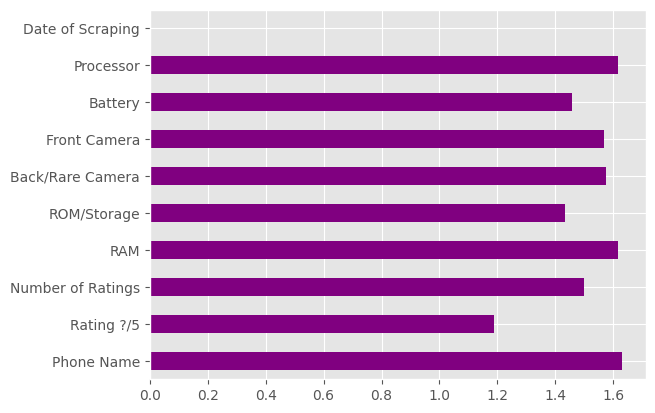

In [16]:
plt.style.use("ggplot")
importance=mutual_info_classif(X,y)
feature_impo=pd.Series(importance,X.columns[0:len(X.columns)])
feature_impo.plot(kind="barh",color="purple")
plt.show()

In [17]:
X=df.drop(["Date of Scraping"],axis=1)

In [18]:
X.head(2)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,746,4.2,404,16,14,171,26,78,187,407
1,789,4.2,639,25,20,118,32,78,173,45


# Splitting the Dataset into Train and Test set

In [19]:
Xtrain, xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=1)

<function matplotlib.pyplot.show(close=None, block=None)>

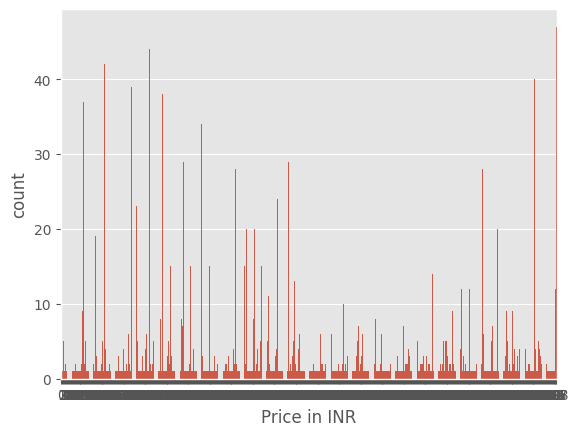

In [20]:
sns.countplot(x="Price in INR",data=df)
plt.show

Putting all the algorithm into a pipeline

In [21]:
from sklearn.pipeline import Pipeline
Pipelines={
      "KNeighbors":Pipeline([("Scaler",StandardScaler()), ("Classifer",KNeighborsClassifier())]),
      "DecisionTree":Pipeline([("CLASSIFIER",DecisionTreeClassifier())]),
      "LogisticRegression":Pipeline([("memory=Scaler",StandardScaler()),("CLASSIFIER",LogisticRegression())]),
      "RandomForest":Pipeline([("Scaler",StandardScaler()),("CLASSIFIER",RandomForestClassifier())]),
      "SVC":Pipeline([("Scaler",StandardScaler()),("CLASSIFIER",SVC())]),
      "GaussianNB":Pipeline([("Scaler",StandardScaler()),("CLASSIFIER",GaussianNB())]),
      "LinearModel":Pipeline([("Scaler",StandardScaler()),("Regression",LinearRegression())]),
      "LinearModel2":Pipeline([("Scaler",StandardScaler()),("Regression",DecisionTreeRegressor())]),
      "LinearModel3":Pipeline([('Scaler',StandardScaler()),('Regression',MLPRegressor())]),
      "LinearModel4":Pipeline([('Scaler',StandardScaler()),('Regression',RandomForestRegressor())]),
}

In [22]:
for name,pipeline in Pipelines.items():
    accuracy=pipeline.fit(xtest,ytest)
    print(F"accuracy of {name}:{accuracy}")

accuracy of KNeighbors:Pipeline(steps=[('Scaler', StandardScaler()),
                ('Classifer', KNeighborsClassifier())])
accuracy of DecisionTree:Pipeline(steps=[('CLASSIFIER', DecisionTreeClassifier())])
accuracy of LogisticRegression:Pipeline(steps=[('memory=Scaler', StandardScaler()),
                ('CLASSIFIER', LogisticRegression())])
accuracy of RandomForest:Pipeline(steps=[('Scaler', StandardScaler()),
                ('CLASSIFIER', RandomForestClassifier())])
accuracy of SVC:Pipeline(steps=[('Scaler', StandardScaler()), ('CLASSIFIER', SVC())])
accuracy of GaussianNB:Pipeline(steps=[('Scaler', StandardScaler()), ('CLASSIFIER', GaussianNB())])
accuracy of LinearModel:Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', LinearRegression())])
accuracy of LinearModel2:Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', DecisionTreeRegressor())])


c:\Users\hdwipe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy of LinearModel3:Pipeline(steps=[('Scaler', StandardScaler()), ('Regression', MLPRegressor())])
accuracy of LinearModel4:Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', RandomForestRegressor())])


In [23]:
for name,pipeline in Pipelines.items():
    accuracy=pipeline.score(xtest,ytest)
    print(F"accuracy of {name}:{accuracy}")

accuracy of KNeighbors:0.3016304347826087
accuracy of DecisionTree:1.0
accuracy of LogisticRegression:0.4701086956521739
accuracy of RandomForest:1.0
accuracy of SVC:0.28804347826086957
accuracy of GaussianNB:1.0
accuracy of LinearModel:1.0
accuracy of LinearModel2:1.0
accuracy of LinearModel3:-1.2600798040200396
accuracy of LinearModel4:0.9999844754882072


In [24]:
accuracy=Pipeline([("Scaler",StandardScaler()),("Regression",LinearRegression())])
print("LinearRegression in process.....")
accuracy.fit(Xtrain,ytrain)
print("Done fitting Training set.")

LinearRegression in process.....
Done fitting Training set.


# prediction

In [25]:
for name,pipeline in Pipelines.items():
    pred=pipeline.predict(xtest)
    print(F"accuracy of {name}:{pred}")

accuracy of KNeighbors:[202  55  45  36 128 441 518  79 456 209 388   6  92 518 235 135  29 106
 300 258 335 407 419  92  73 485 472 182 346 258 506 203 518   2 261  45
 188 202  92  92 472  79 506  92  21 167  92  55  40 202  45  23 300 188
  36 135 160  21 506  45 258  92 128  23 349 167 441 465 258  45  23  40
 518  60  98  40   8 388  57 273  23 335  79 147 319 415 238 106 106 506
  24  88  22 188  57 167 363 167 441   9 506 188 238 258 315  79   2  92
 182  61 456  18 127 400  21 258 261 106   2 407 238  79 182  79 335 106
 518 335 147 209 202 235  23  95 128 506 407 106 287 472 400 145 235  73
  57 433  96 248   2 202 202 234 147 157  92 158 419 157  23 518  23  45
 202   8  92 287 209 159 202  23 158 159 485 506  23 182  55 346 300  60
 495 485 441 234  29 441 261 400 518 182  23 238 235 224 407  11  92 159
 273 234 335  97 147  18  98  92 159 400 188 235 441  79 518 495 147 238
 459  95 433 106 506 234  98 202 159   2 182 518 167  92 168  45 258 335
 518 159 441  57 188 506 224

In [26]:
for name,pipeline in Pipelines.items():
    print("MAE",mean_absolute_error(ytest,pred))
    print("MAPE",mean_absolute_percentage_error(ytest,pred))
    print("MSE",mean_squared_error(ytest,pred))
    print("R2 SCORE",r2_score(ytest,pred))

MAE 0.4003260869565196
MAPE 0.004848516768037449
MSE 0.3743065217391281
R2 SCORE 0.9999844754882072
MAE 0.4003260869565196
MAPE 0.004848516768037449
MSE 0.3743065217391281
R2 SCORE 0.9999844754882072
MAE 0.4003260869565196
MAPE 0.004848516768037449
MSE 0.3743065217391281
R2 SCORE 0.9999844754882072
MAE 0.4003260869565196
MAPE 0.004848516768037449
MSE 0.3743065217391281
R2 SCORE 0.9999844754882072
MAE 0.4003260869565196
MAPE 0.004848516768037449
MSE 0.3743065217391281
R2 SCORE 0.9999844754882072
MAE 0.4003260869565196
MAPE 0.004848516768037449
MSE 0.3743065217391281
R2 SCORE 0.9999844754882072
MAE 0.4003260869565196
MAPE 0.004848516768037449
MSE 0.3743065217391281
R2 SCORE 0.9999844754882072
MAE 0.4003260869565196
MAPE 0.004848516768037449
MSE 0.3743065217391281
R2 SCORE 0.9999844754882072
MAE 0.4003260869565196
MAPE 0.004848516768037449
MSE 0.3743065217391281
R2 SCORE 0.9999844754882072
MAE 0.4003260869565196
MAPE 0.004848516768037449
MSE 0.3743065217391281
R2 SCORE 0.9999844754882072


In [27]:
print("MAE",mean_absolute_error(ytest,pred))
print("MAPE",mean_absolute_percentage_error(ytest,pred))
print("MSE",mean_squared_error(ytest,pred))
print("R2 SCORE",r2_score(ytest,pred))

MAE 0.4003260869565196
MAPE 0.004848516768037449
MSE 0.3743065217391281
R2 SCORE 0.9999844754882072


In [28]:
outcome={
    "Actual Price":ytest,
    "predicted Price":pred
}
df3=pd.DataFrame(outcome)
df3.head()

,Actual Price,predicted Price
556,202,202.07
1386,55,55.28
1450,135,134.78
111,106,106.00
1787,128,128.05


<Axes: xlabel='Price in INR'>

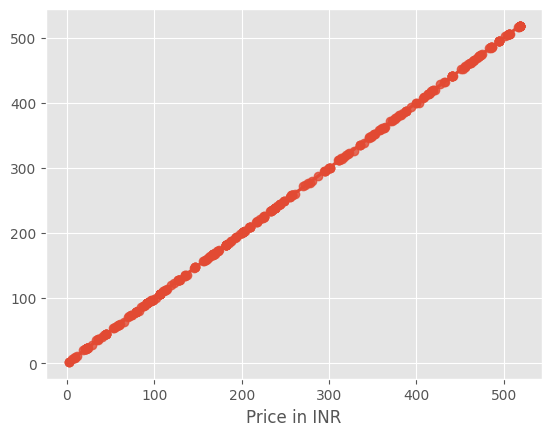

In [29]:
sns.regplot(x=ytest,y=pred)